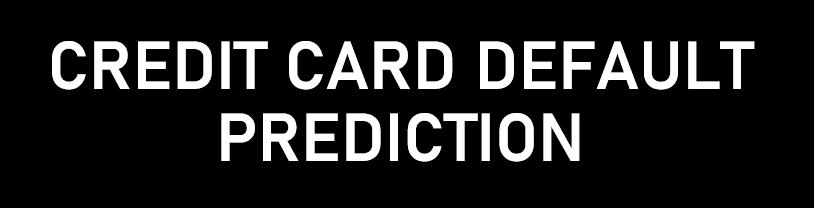

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
credit = pd.read_csv("https://github.com/YBIFoundation/Dataset/raw/main/Credit%20Default.csv")
credit

,Income,Age,Loan,Loan to Income,Default
0,66155.92510,59.017015,8106.532131,0.122537,0
1,34415.15397,48.117153,6564.745018,0.190752,0
2,57317.17006,63.108049,8020.953296,0.139940,0
3,42709.53420,45.751972,6103.642260,0.142911,0
4,66952.68885,18.584336,8770.099235,0.130990,1
...,...,...,...,...,...
1995,59221.04487,48.518179,1926.729397,0.032535,0
1996,69516.12757,23.162104,3503.176156,0.050394,0
1997,44311.44926,28.017167,5522.786693,0.124636,1
1998,43756.05660,63.971796,1622.722598,0.037086,0


In [ ]:
credit.head()

,Income,Age,Loan,Loan to Income,Default
0,66155.92510,59.017015,8106.532131,0.122537,0
1,34415.15397,48.117153,6564.745018,0.190752,0
2,57317.17006,63.108049,8020.953296,0.139940,0
3,42709.53420,45.751972,6103.642260,0.142911,0
4,66952.68885,18.584336,8770.099235,0.130990,1


In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          2000 non-null   float64
 1   Age             2000 non-null   float64
 2   Loan            2000 non-null   float64
 3   Loan to Income  2000 non-null   float64
 4   Default         2000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 78.2 KB


In [ ]:
credit.describe()

,Income,Age,Loan,Loan to Income,Default
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,45331.600018,40.927143,4444.369695,0.098403,0.141500
std,14326.327119,13.262450,3045.410024,0.057620,0.348624
min,20014.489470,18.055189,1.377630,0.000049,0.000000
25%,32796.459720,29.062492,1939.708847,0.047903,0.000000
50%,45789.117310,41.382673,3974.719418,0.099437,0.000000
75%,57791.281670,52.596993,6432.410625,0.147585,0.000000
max,69995.685580,63.971796,13766.051240,0.199938,1.000000


In [ ]:
credit.shape

(2000, 5)

In [ ]:
credit.columns

Index(['Income', 'Age', 'Loan', 'Loan to Income', 'Default'], dtype='object')

In [ ]:
x = credit[['Income', 'Age', 'Loan', 'Loan to Income']]
y = credit['Default']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2529)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
accuracy_score(y_test, y_pred)

0.95

In [ ]:
confusion_matrix(y_test,y_pred)

array([[506,  13],
       [ 17,  64]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       519
           1       0.83      0.79      0.81        81

    accuracy                           0.95       600
   macro avg       0.90      0.88      0.89       600
weighted avg       0.95      0.95      0.95       600





---



# **ENHANCEMENT SUGGESTED BY CHATGPT**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          2000 non-null   float64
 1   Age             2000 non-null   float64
 2   Loan            2000 non-null   float64
 3   Loan to Income  2000 non-null   float64
 4   Default         2000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 78.2 KB


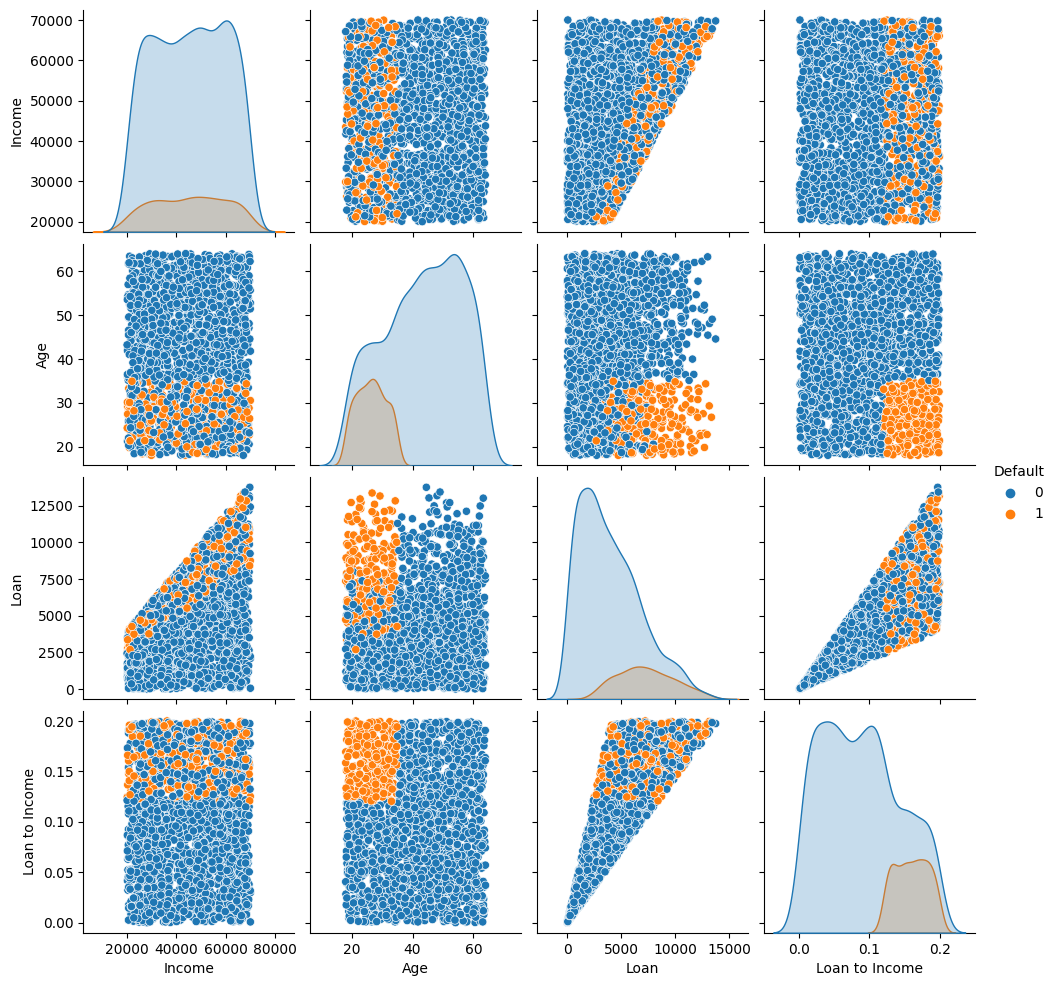

Accuracy: 0.9566666666666667
Confusion Matrix:
 [[508  11]
 [ 15  66]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       519
           1       0.86      0.81      0.84        81

    accuracy                           0.96       600
   macro avg       0.91      0.90      0.91       600
weighted avg       0.96      0.96      0.96       600



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
url = "https://github.com/YBIFoundation/Dataset/raw/main/Credit%20Default.csv"
credit = pd.read_csv(url)

# Explore data
credit.head()
credit.info()
credit.describe()
credit.shape
credit.columns

# Visualize relationships between features and target
sns.pairplot(credit, hue='Default', vars=['Income', 'Age', 'Loan', 'Loan to Income'])
plt.show()

# Prepare data
x = credit[['Income', 'Age', 'Loan', 'Loan to Income']]
y = credit['Default']

# Feature scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=2529)

# Model training
model = LogisticRegression(C=1.0)  # You can adjust the 'C' parameter for regularization
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)